In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import binom
import scipy.stats as sps
%matplotlib inline

# 4.1

Fantasy Sports (especially Fantasy Football) are extremely popular in the United States. Essentially, ‘owners’ (regular citizens) compete by picking the football players that they think will perform the best in a specific set of real-life games. Each football player is assigned a numerical score based on their real-life performance (higher score is better), and the ‘owner’ that scores the most points in aggregate (the sum of all of the football players they picked, or their ‘lineup’) wins.

Imagine that you need to fill two more spots on your ‘lineup’ (pick two more players) and you have two options: you could select Tom Brady (widely considered the greatest player of all time) and Jimmy Graham, or Eli Manning and Rob Gronkowski. By considering historical data, you can reasonably approximate the ‘fantasy points’ that each player will indepedently score: T∼N(27,4), J∼N(3,1), E∼N(11,2), R∼N(18,5), where T stands for Tom Brady’s score, etc. (the independence condition is often unrealistic, especially here because Brady and Gronkowski are on the same team, but we will assume independence here). Which option (Brady and Graham, or Manning and Gronkowski) is more likely to score more points? Find the probability of this option scoring more than the other option; you can leave your answer in terms of Φ.

In [2]:
# Generating random scores
samps = 10000

T = np.random.normal(loc = 27, scale = np.sqrt(4), size = samps)
J = np.random.normal(loc = 3, scale = np.sqrt(1), size = samps)
E = np.random.normal(loc = 11, scale = np.sqrt(2), size = samps)
N = np.random.normal(loc = 18, scale = np.sqrt(5), size = samps)

#

print('P([T+J] > [E+N]) simulated %.2f%%' % (100*np.mean((T + J) > (E + N))))

#

print('P([T+J] > [E+N]) analytical %.2f%%' % (100*(1 - sps.norm.cdf(x = 0, loc = 1, scale = np.sqrt(12)))))

P([T+J] > [E+N]) simulated 61.42%
P([T+J] > [E+N]) analytical 61.36%


# 4.1 Analytical Solution

Since the normal distribution is symmetrical, it has equal mass on both sides of the mean. Therefore, the probability that one normal is greater than another is a function of the locations of the means. Also, the sum of *independent* normals is itself normally distributed. So we can rephrase this problem as:  

T + J ~ N(27,4) + N(3,1) = N(30,5)  
E + N ~ N(11,2) + N(18,5) = N(29,7)

$\therefore$ N(30,5) > N(29,7)

### $\text{P([T+J] > [E+N]) = P(N(30,5) > N(29,7)) = P(N(1,12) > 0)} = $
### $1 - \phi(mean = 1, var = 12,x = 0) \approx .61$

So choosing Tom and Jimmy is better about 61% of the time.

# 4.2

a. Is it possible to have two i.i.d. random variables X and Y such that P(X>Y)≠1/2?

For the following parts, let X,Y be i.i.d. N(0,1).

b. E(Φ(X))___Φ(E(X))

c. P(X/Y<0)___P(|X−Y|2√<1)

In [3]:
# a
samps = 10000
mean = 1
sd = 3

print('P(X > Y) continuous example:')
print(np.mean(np.random.normal(loc = mean, scale = sd, size = samps) > np.random.normal(loc = mean, scale = sd, size = samps)))

n = 10
p = 0.7

print('\nP(X > Y) discrete example:')
print(np.mean(np.random.binomial(n = n, p = p, size = samps) > np.random.binomial(n = n, p = p, size = samps)))

# b
X = np.random.normal(loc = 0, scale = 1, size = samps)
Y = np.random.normal(loc = 0, scale = 1, size = samps)

print('\n\nE(Φ(X)) vs. Φ(E(X)):')
print(round(np.mean(sps.norm.cdf(x = X, loc = 0, scale = 1)),4))
print(round(sps.norm.cdf(x = np.mean(X), loc = 0, scale = 1),4))

# c
print('\nP(X/Y < 0) vs. P(|X−Y|/√2 < 1):')
print(round(np.mean(X/Y < 0),4))
print(round(np.mean(np.abs(X-Y)/np.sqrt(2) < 1),4))

P(X > Y) continuous example:
0.5109

P(X > Y) discrete example:
0.3963


E(Φ(X)) vs. Φ(E(X)):
0.4951
0.4927

P(X/Y < 0) vs. P(|X−Y|/√2 < 1):
0.4963
0.6877


### 4.2 Analytical Solution

a. In the continuous case, $P(X > Y) = P(X \geq Y)$. For any two i.i.d. random variables, this should always be 1/2. There's no reason to believe one should be greater than the other, on average.  

In the discrete case this is usually not true, because $P(X > Y) \neq P(X \geq Y)$. The probability of a tie, $P(X = Y)$, is usually nonzero - this breaks the 1/2 balance. There is a simulated example with binomial RVs above.  

b. The left side becomes a Standard Uniform, by Universality. That gives a mean of 1/2. The right side becomes $\phi(0)$, which is 1/2 for a Standard Normal. They are equivalent.  

c. The ratio of two independent normals is [*not* normally distributed](https://en.wikipedia.org/wiki/Ratio_distribution#Gaussian_ratio_distribution) but it is symmetric around 0, since there's nothing to break the balance of mass. A symmetric distribution around 0 has 50% of its mass on either side. So the left is 0.5. 
  
Let's focus on the right side now. The difference of two independent normals is itself normally distributed. In this case, it becomes $N(0,1) - N(0,1) = N(0,2)$. Scaling down by $\sqrt{2}$, makes the difference a Standard Normal. Constricting the absolute value to be less than 1 means we want to capture probability mass within 1 standard deviation of the mean on either side. Using the 68-95-99.7 rule, we can see that this is $\approx .68$, which is greater than the left side.  

  
To summarize:  
b. $E(\Phi(X)) = \Phi(E(X))$  
c. $P(X/Y < 0) \leq P(\frac{|X - Y|}{\sqrt{2}} < 1)$


# 4.3

Imagine that you won in the first round of your diving competition, and now, in the next round, you perform only one dive. The scoring of your dive is as follows: you will be judged by three judges on a scale of 0 to 10 (10 being the best) and the maximum rating given by the three judges will be your score. Unlike the previous problem, ratings are given on a continuous scale; instead of just integers, a judge may give 3.14, for example.

Unfortunately, the judges in this specific competition do not have an eye for the sport at all, and each one independently assigns you a random score between 0 and 10.

a. What is the probability that the first judge gives you the highest score of the group?

b. Let H be your competition score. Find E(H).

P(max = Judge 1):
0.3316


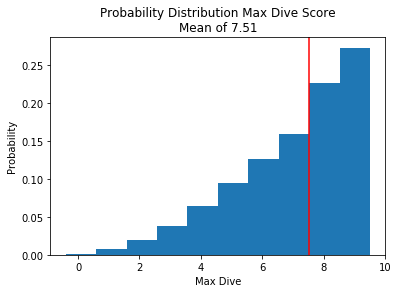

In [4]:
samps = 10000

# a 
print('P(max = Judge 1):')
print(
    np.mean(
        np.random.uniform(low = 0, high = 10, size = samps) >=
        np.maximum(np.random.uniform(low = 0, high = 10, size = samps),
              np.random.uniform(low = 0, high = 10, size = samps))
    )
)

# b
d1 = np.random.uniform(low = 0, high = 10, size = samps)
d2 = np.random.uniform(low = 0, high = 10, size = samps)
d3 = np.random.uniform(low = 0, high = 10, size = samps)

maxs = np.maximum.reduce([d1,d2,d3])

#

_ = plt.hist(maxs, density = True, align = 'left')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Max Dive')
_ = plt.axvline(x = np.mean(maxs), color = 'r', linestyle = '-')
_ = plt.title('Probability Distribution Max Dive Score\nMean of %.2f' % (np.mean(maxs)))

### 4.3 Analytical Solution

a. There's nothing differentiating or conditioning the random generation of dive scores amongst the three judges. By symmetry, each judge has a 1/3 probability of assigning the highest score.  

b. The probability of the high score being less than some value $h$ can be summarized as:  

### $P(H \leq h) = P(Dive1 \leq h) \cap P(Dive2 \leq h) \cap P(Dive3 \leq h) = h/10 * h/10 * h/10 = \frac{h^3}{1000}$

This gives us the CDF of $H$. To get to the PDF, we need to take the derivative:  

### $f(h) = \frac{3h^2}{1000}$  

Next, to take the expectation we need to multiply by $h$ and take the integral:  

### $\int_{0}^{10} (h)\frac{3h^2}{1000}dh = \int_{0}^{10}\frac{3h^3}{1000}dh  = \Big|_{0}^{10} \frac{3h^4}{4000} = 7.5$

This matches our simulated answer above. Something important to note is that we can multiply the CDFs in the first part of this computation *only* because they're independent. Breaking this independence will give a different solution.

# 4.4

a. Let X∼N(0,1). What is E($X^5$)?

b. Let Y∼Pois(λ). Find E(c/(Y+1)) where c is a constant.

c. Let Q be a Uniform Distribution such that Q∼Unif(0,4). Find Var(√Q).

Hint: it may be easier to work in terms of the standard uniform, and the convert.

In [5]:
samps = 100000

# a
X = np.random.normal(loc = 0, scale = 1, size = samps)

print('E(X^5): %.4f' % np.mean(X**5))

# b
lam = 3.14
c = 2

Y = np.random.poisson(lam = lam, size = samps)

print('\nE[c/(Y + 1)]: %.4f' % np.mean(c/(Y + 1)))

# c
low = 0
high = 4

Q = np.random.uniform(low = low, high = high, size = samps)

print('\nVar(√Q): %.4f' % np.var(np.sqrt(Q)))

E(X^5): 0.0026

E[c/(Y + 1)]: 0.6092

Var(√Q): 0.2222


### 4.4 Analytical Solution

a. Similar to 4.2.c, we have a situation where the symmetry of the normal is not broken. Raising a normal to the power 5 should squeeze values under 1 and stretches values over 1. This doesn't affect the balance of mass around 0. Therefore, the mean should be 0.  

b. Since the Poisson is a discrete distribution, we need to apply the transformation for this problem on the PMF discretely:  

## $E(\frac{c}{Y + 1}) = \sum_{k=0}^{\infty}(\frac{c}{k + 1})(\frac{\lambda^k}{k!e^\lambda})$  

We can move the constants $e^\lambda$ and $c$ out of the summation. We can also increment the $k!$ by combining it with the $(k+1)$:

## $\frac{c}{e^\lambda} \sum_{k=0}^{\infty}(\frac{1}{k + 1})(\frac{\lambda^k}{k!}) = \frac{c}{e^\lambda} \sum_{k=0}^{\infty}\frac{\lambda^k}{(k+1)!}$

This *almost* looks like the Taylor Series for $e^x$ where $x = \lambda$:

### $e^{x} = \sum^{\infty}_{n=0} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ...$

We can multiply by $\lambda/\lambda$ to get closer to what we want:  

### $\frac{c}{\lambda e^\lambda} \sum_{k=0}^{\infty}\frac{\lambda^{k+1}}{(k+1)!}$

The summation looks like it skips to the second term in the Taylor Series of $e^\lambda$, so we need to subtract out the 1 that it misses:  

### $E(\frac{c}{Y+1}) = \frac{c}{\lambda e^\lambda}(e^\lambda - 1)$  

c. We know that $Q = 4U$, where $U \sim Unif(0,1)$. We also know that $\sqrt{Q} = \sqrt{4U} = 2\sqrt{U}$ and therefore $Var(\sqrt{Q}) = Var(2\sqrt{U}) = 4Var(\sqrt{U})$. So if we find $Var(\sqrt{U})$, we just need to multiply by 4 to get our answer.  

Next, we can use the definition of variance to simplify things a bit:  

#### $Var(\sqrt{U}) = E((\sqrt{U})^2) - (E(\sqrt{U}))^2 = Var(\sqrt{U}) = E(U) - (E(\sqrt{U}))^2$  

The first part is easy, that's just 0.5. The second part requires a modification of the uniform CDF:  

#### $E(\sqrt{U}) = \int_{0}^{1} f(u)\sqrt{u} \; du = \int_{0}^{1}\sqrt{u} \; du = \Big|_{0}^{1} \frac{2}{3}u^\frac{3}{2} = \frac{2}{3}$

Bringing it all together, we get:  

#### $Var(\sqrt{U}) = E(U) - (E(\sqrt{U}))^2 = .5  - \frac{2}{3}^2 = \frac{1}{18}$

#### $Var(\sqrt{Q}) = 4Var(\sqrt{U}) = \frac{4}{18}$

# 4.5

Let H=1−U, where U is the Standard Uniform, and G follow a Gamma Distribution (which we will cover later) with parameters α and λ, PDF $f(g) = \frac{\lambda^\alpha}{\Gamma(\alpha)}g^{\alpha-1}e^{-g\lambda}$ and CDF F(g). Find E(H−F(G)).

In [6]:
samps = 10000

#

G = np.random.gamma(shape = 2, scale = 3, size = samps)
H = 1 - np.random.uniform(low = 0, high = 1, size = samps)

#

print('E(H−F(G)) approx: %.4f' %
    np.mean(
        H - sps.gamma.cdf(x = G, a = 2, loc = 0, scale = 3)
    )
)

E(H−F(G)) approx: -0.0027


### 4.5 Analytical Solution

Plugging a random variable into its own CDF yields a Standard Uniform, this is by Universality. This reduces the expectation down to:  

### $E(1 - U_1 - U_2) = E(1) - E(U_1) - E(U_2) = 1 - 0.5 - 0.5 = 0$

This is by the linearity of expectation.

# 4.6

Consider a ‘random cube’ generated with side length S∼Unif(0,10). Let V be the volume of the cube. Find E(V),Var(V) as well as the CDF and PDF of V.

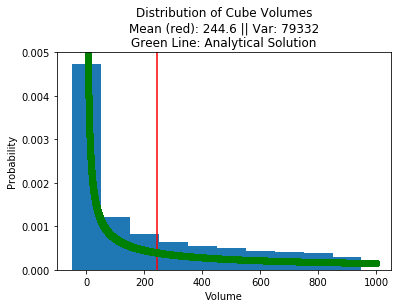

In [7]:
samps = 10000

S = np.random.uniform(low = 0, high = 10, size = samps)
V = S**3

_ = plt.hist(V, density = True, align = 'left')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Volume')
_ = plt.axvline(x = np.mean(V), color = 'r', linestyle = '-')
_ = plt.title('Distribution of Cube Volumes\nMean (red): %.1f || Var: %.0f\nGreen Line: Analytical Solution' % (np.mean(V),np.var(V)))

# Analytical PDF, derived below

def analt_prob(v):
    return (1/(10**(1/3) * 30 * v**(2/3)))

analt_prob = np.vectorize(analt_prob)

#

unif = np.sort(np.random.uniform(low = 0, high = 1000, size = 100000))

_ = plt.plot(unif,
            analt_prob(unif),
            'go--',
            linewidth = 2)

axes = plt.gca()
_ = axes.set_ylim([0,0.005])

### 4.6 Analytical Solution

Since we know that $V = S^3$, we can apply this transformation to the Uniform CDF and work backwards to get the expected value and variance:  

### $E(V) = \frac{1}{10}\int_{0}^{10} s^3 ds = \frac{s^4}{40} \big|_{0}^{10} = \frac{10,000}{40} = 250$  

To get the variance we have to remember that $Var(V) = E(V^2) - (E(V))^2$. Now we need $E(V^2)$:

### $E(V^2) = E[(S^3)^2] = E(S^6) = \frac{1}{10}\int_{0}^{10} s^6 ds = \frac{s^7}{70} \big|_{0}^{10} = \frac{10,000,000}{70}$  

Which gives us the following formula for variance:

$Var(V) = E(V^2) - (E(V))^2 = \frac{10,000,000}{70} - 250^2 \approx 80,357$  

We know that $V = S^3$ and therefore $V^{1/3} = S$. Using this, we can see that: $P(V \leq v) = P(S^3 \leq v) = P(S \leq v^{1/3})$. We can apply this transformation to the Uniform CDF:

### $P(S \leq v^{1/3}) = \frac{v^{1/3}}{10}$

We can take the derivative of this to get the pseudo-PDF. We can then integrate to find out how much we have to adjust the pseudo-PDF by so that it integrates to 1.

### $\int_{0}^{10,000} \frac{1}{30 * v^{2/3}}  = 10^{1/3}\; dv$  

So the PDF becomes:  

## $f(v) = \frac{1}{10^{1/3} * 30 * v^{2/3}}$  

Only in the range [0,10000]. Otherwise 0.

And the CDF becomes:

## $P(V \leq v) = \frac{v^{1/3}}{10 * 10^{1/3}}$

Only in the range [0,10000]. Otherwise 0 below and 1 above.

To find the adjustment to the CDF/PDF we could have also solved for c where $\frac{10000^{1/3}}{10} * c = 1$. That is, the CDF evaluated at the maximum of the support should be 1.

# 4.7

Let X∼N(0,1). For what values of b does $E(e^{{x^b}/2})$ diverge?

### 4.7 Analytical Solution

By LoTUS:  

## $E(e^{x^b/2}) = \int_{-\infty}^{\infty} e^{x^b/2} e^{-x^2/2} = \int_{-\infty}^{\infty} e^{(x^b-x^2)/2}$

When $b \geq 2$, as x increases the function just blows up to $\infty$, which makes the integral diverge. Any value below 2 for b shrinks towards 0 as x approaches $-\infty$ or $\infty$. This shrinkage effect makes the integral converge since the function doesn't blow up at the extremes.

# 4.8

Let X be a discrete random variable such that the support of X is 1,2,...,n, where n>2, and $P(X=x) = \frac{2x}{n(n+1)}$.

a. Verify that P(X=x) is a valid PMF.

b. Find E(X) and Var(X).

Hint: Feel free to use these facts: $\sum_{k = 1}^n k = \frac{n(n + 1)}{2}, \sum_{k = 1}^n k^2 = \frac{n(n + 1)(2n + 1)}{6}, \sum_{k = 1}^n k^3 = \Big(\frac{n(n + 1)}{2}\Big)^2$

### 4.8 Analytical Solution

(a) Once we factor out the constants from the summation, it’s easy to see this sums to 1 - making it a valid PMF.

### $\sum_{k = 1}^n \frac{2k}{n(n + 1)} = \frac{2}{n(n + 1)} \sum_{k = 1}^n k = \frac{2}{n(n + 1)}\cdot \frac{n(n + 1)}{2} = 1$  

(b) The key here is to factor out the constants again and substitute with parts of the hint.  

### $E(X) = \sum_{x = 1}^n x^2 \frac{2}{n(n + 1)} = \frac{2}{n(n + 1)} \sum_{k = 1}^x x^2 = \frac{2}{n(n + 1)} \cdot \frac{n(n + 1)(2n + 1)}{6} = \frac{2n + 1}{3}$  

At this point, we already have half of what we need for the variance.  

### $E(X^2) = \sum_{k = 1}^n x^3 \frac{2}{n(n + 1)} = \frac{2}{n(n + 1)} \sum_{k = 1}^n x^3 = \frac{2}{n(n + 1)} \cdot \Big(\frac{n(n + 1)}{2}\Big)^2 = \frac{n(n + 1)}{2}$  

### $Var(X) = E(X^2) - (E(X))^2 = \frac{n(n + 1)}{2} - \Big(\frac{2n + 1}{3}\Big)^2$  

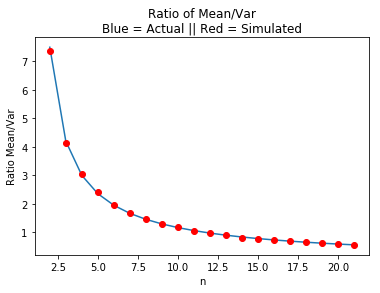

In [8]:
# (b)

def draw_samp(n, size):
    
    nums = np.arange(1,n+1)
    
    ps = 2*nums/(n*(n+1))
    
    return np.random.choice(a = nums, size = size, replace = True, p = ps)

# Look at ratio of Mean/Var to see if simulations converge to actual solution
def samp_mean_d_var(x):
    return np.mean(x)/np.var(x)

# Analytical solution
def analt_mean_d_var(n):
    
    mean = (2*n+1)/3
    
    var = (n*(n+1))/2 - ((2*n+1)/3)**2
    
    return mean/var


#

samp_mean_d_var(draw_samp(n = 12, size = 10000))

#

comp = pd.DataFrame({
    'n': np.arange(2,22),
    'Ratio_Sim': [samp_mean_d_var(draw_samp(n = i, size = 10000)) for i in range(2,22)],
    'Ratio_Analt': [analt_mean_d_var(i) for i in range(2,22)]
})

#

_ = plt.plot(comp['n'],
             comp['Ratio_Analt'])

_ = plt.plot(comp['n'],
             comp['Ratio_Sim'], 
             'ro')

#

_ = plt.title('Ratio of Mean/Var\nBlue = Actual || Red = Simulated')

_ = plt.ylabel('Ratio Mean/Var')
_ = plt.xlabel('n')

# 4.9

Imagine a job that pays 1 dollar after the first day, then 2 dollars after the second day, then 4 dollars after the third day, etc., such that the payments continue to double. However, at the end of each day, your boss flips a fair coin, and if it lands tails, you are fired (before you are paid). Let X be the total, lifetime earnins that you get from this job.

a. Find E(X), as well as the PMF of X.

b. Based on E(X), is this a job that you want? Does E(X) tell the whole story?

### 4.9 Analytical Solution

(a)  

The probability of surviving n-days in this binary selection process is $\frac{1}{2^{x+1}}$. For example, to survive only the first day we need to get heads on the first flip (p = 1/2) and a tails on the second flip (p = 1/2). Since both of these are independent, we multiply the probabilities to get 1/4. This multiplication logic can be stretched to any number of survival days. The support of this PMF is $[0,\infty)$.

The expected value is simply the sum of the PMF across the support, multiplied by every payout:  

### $E(X) = 0 * 1/2 + \sum_{x = 1}^\infty \frac{2^{x-1}}{2^{x+1}} = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} + ... = \infty$

(b)  

The expected value doesn't tell the whole story. This isn't really a practical result because in real life, we work with finite sample sizes. Even in fixed sample sizes, the variance becomes huge. 

This problem is related to the [St. Petersburg Paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox).

In [9]:
# Simulates a payoff value in a fixed sampling process 
def payoff_sim(n):

    flips = np.random.randint(low = 0, high = 2, size = n)
    
    # When we never see heads
    if np.sum(flips) == 0:
        return (2**(n-1))
    
    # When we strike out right away
    if flips[0] == 1:
        return 0
    
    return (2**(np.where(flips == 1)[0][0]-1))

#

print('Mean(n = 10): %.2f' % np.mean([payoff_sim(n = 10) for i in range(10000)]))
print('Var(n = 10): %.2f' % np.var([payoff_sim(n = 10) for i in range(10000)]))

Mean(n = 10): 2.60
Var(n = 10): 407.30


# 4.10

Let X∼Expo(λ) and Y=X+c for some constant c. Does Y have an Exponential distribution? Use intuition about the Exponential distribution to answer this question.

### 4.10 Analytical Solution

Y does **not** have an Exponential distribution. When c is not zero, this breaks the traditional $[0,\infty]$ support. When c is positive, it also erases the memorylessness property of the Exponential. If c = 9 and we've waited for 5 minutes, we know for a fact that we have to wait at least 4 more minutes for any probability of observing our event.

# 4.11

Let X,Y be i.i.d. N(0,1). Find $E((X+Y)^2)$ using the fact that the linear combination of Normal random variables is a Normal random variable.

### 4.11 Analytical Solution

We know that $X + Y$ becomes normally distributed, let's label it as $Z \sim N(0,2)$. We're now looking for $E(Z)^2$, which is part of the formula for variance:  

## $Var(Z) = E(Z^2) + E(Z)^2$  

We already know the variance, so we can substitute and get our expected value:  

## $2 = E(Z^2) + 0^2 \rightarrow 2 = E(Z^2)$

In [10]:
samps = 10000

X = np.random.normal(loc = 0, scale = 1, size = samps)
Y = np.random.normal(loc = 0, scale = 1, size = samps)

print('Simulated Mean: %.2f' % np.mean((X+Y)**2))

Simulated Mean: 1.93


# 4.12

a. You plan to try to log on to your email at some random (Uniform) time between 4:00 and 5:00. Independently, the interet will crash sometime between 4:00 and 5:00 and will be unavailable from the time that it crashes to 5:00. What is the probability that you are able to log on to your email (i.e., the computer is not crashed when you log on)?  
  
b. In this part, two ‘break points’ are randomly (Uniformly) and independently selected between 4:00 and 5:00. The internet will not be available between these two points, but will be available for the rest of the hour. What is the probability that the computer is not crashed when you log on?

### 4.12 Analytical Solution

(a)  

The login time and crash time can both be represented by independent Uniform random variables. From 4.2.a we know that $P(U_{login} < U_{break}) = 1/2.$ That is, for two *continuous*  i.i.d. random variables X and Y, P(X > Y) = 1/2. We can also see that by symmetry we should expect to see as much 'down time' as 'up time'.

(b)  

We can imagine drawing a line segment and picking two points on it randomly. On average, this will cut the line segment into three pieces of equal size. The area between the two points, 1/3, is where the crash will occur. The area outside of this section, 2/3, is when we will be able to use the computer. 

In [11]:
size = 10000

# (a)

logins = np.random.uniform(size = size)

crashes = np.random.uniform(size = size)

print('P(Login < Crash) = %.2f' % np.mean(logins < crashes))

# (b)

# Generated array of sorted [start,end] break times
breaks = np.random.uniform(size = (size,2))

breaks = np.sort(breaks, axis = 1)

#

logins = np.random.uniform(size = size)

#
# Below lower end of the crash period or above higher end
print('\nP(OK login) = %.2f' % np.mean((logins < breaks[:,0]) + (breaks[:,1] < logins)))

P(Login < Crash) = 0.50

P(OK login) = 0.67


# 4.13

Imagine a single elimination tournament with $2^n$ teams, where n≥1. ‘Single elimination’ means that if you lose a game, you are eliminated. You can envision the tournament set-up in simple cases. When n=1, we have two teams that play each other for the championship. When n=2, we have four teams; they are split into pairs, and the winner of each pair meets in the championship. The tournament set-up continues to expand in this way as we add teams (see the March Madness tournament for an example where n=6).

Imagine for this problem that every team is equally skilled (in real life, this is clearly not a reasonable assumption) such that any random team has equal probabilities of winning or losing against any other random team. Assume games are independent (also not a reasonable assumption in real life). Let X be the number of games won by the first team.

a. Find E(X) using LoTUS.  

b. Find E(X) using a symmetry argument.  

### 4.13 Analytical Solution

(a)  

Let's pretend n = 4 and we care about the probability of winning exactly 3 rounds. That becomes P(Win 1st) x P(Win 2nd) x P(Win 3rd) x P(Lose 4th) = $1/{2^3}$. Generally speaking, the probability boils down to P(Winning n rounds) x P(Losing n+1th round). The only exception to this rule is when we're solving for the probability of winning all rounds, in this case there is no n+1th round. Here's the PMF:  

## $P(X = x) = I(X = n) * \frac{1}{2^n} + (1-I(X = n)) * \frac{1}{2^{x+1}}$  

I(X = n) is an indicator function that returns 1 if we're looking at the probability of winning all rounds and 0 otherwise. The support is [0, n]. Next, we can multiply the PMF by X and sum across the support to get the expected value:  

## $E(X) = \frac{n}{2^n} + \sum_{x = 0}^{n-1} \frac{x}{2^{x + 1}} = \frac{1}{2^2} + \frac{2}{2^3} + \frac{3}{2^4} + ... + \frac{n - 1}{2^n} + \frac{n}{2^n}$  

(b)  

There's nothing in the problem description that would cause us to favor one team over another. Every team has an equal probability of winning. There are $2^n$ teams in total. For any n, there are only $2^n - 1$ games that can be played until the championship is won. Therefore:  

### $E(X_1) + E(X_2) + ... + E(X_{2^n}) = 2^n - 1$

### $E(X) = \frac{\text{Total Average Winnings}}{\text{Number of Teams}} = \frac{2^n - 1}{2^n}$  

In [12]:
def sim_game(max_wins):
    
    res = 0
    
    while True:
        
        flip = np.random.binomial(n = 1, p = 0.5)
        
        if flip == 0:
            break
            
        if res == max_wins:
            break
        
        res += 1
    
    return res

#

sim_games = np.mean([sim_game(max_wins = 4) for i in range(10000)])

print('Simulated mean when n = 4: %.2f' % sim_games)
print('Analytical mean when n = 4: %.3f' % ((2**4-1)/(2**4)))

Simulated mean when n = 4: 0.92
Analytical mean when n = 4: 0.938
